# Hw01 - Knapsack problem

## Content

- [Imports](#Imports)
- [Load C++ library for Knapsack solution](#load-c++-library-for-knapsack-solution)
- [Load dataframe functions](#load-dataframe-functions)
- [](#)

## Imports


In [25]:
import pandas as pd
import ctypes
from ctypes import c_char_p, c_void_p, c_double
import json
import seaborn as sns

## Load C++ library for Knapsack solution

In [26]:
# Do the combinatorics
clib = ctypes.cdll.LoadLibrary('./compute/build/knapsack.so')
clib.solve.argtypes = [c_char_p, c_char_p]
clib.solve.restype = c_double

## Load dataframe functions

In [27]:
# Load dataframes
def insToDf(path):
    data_nr_ins_4 = pd.read_csv(path, sep=' ', index_col=0, header=None)
    df_ins = data_nr_ins_4.copy()
    df_ins.index = df_ins.index.rename("ID")
    df_ins = df_ins.rename(columns = {1: "n", 2: "M", 3: "B"})
    df_ins.columns = [str(x) for x in df_ins.columns]
    df_ins["weights"] = df_ins.apply(lambda x: list(x[df_ins.columns[3::2]]), axis=1)
    df_ins["values"] = df_ins.apply(lambda x: list(x[df_ins.columns[4::2]]), axis=1)
    df_ins = df_ins.drop(df_ins.columns[3:-2], axis=1)
    df_ins.index = abs(df_ins.index)
    return df_ins

def solToDf(path):
    data_nr_sol_4 = pd.read_csv(path, sep=' ', index_col=0, header=None)
    df_sol = data_nr_sol_4.copy()
    df_sol.index = df_sol.index.rename("ID")
    df_sol = df_sol.drop(df_sol.columns[-1], axis=1)
    df_sol["solution"] = df_sol.apply(lambda x: list(x[df_sol.columns[2:]]), axis=1)
    df_sol = df_sol.drop(df_sol.columns[2:-1], axis=1)
    df_sol = df_sol.rename(columns = {1: 'n', 2: "optimum"})
    # data_nr_4.index = data_nr_4.index.rename("ID")
    return df_sol

def resToDf(path):
    data_nr_res_4 = pd.read_csv(path, sep=' ', index_col=0, header=None)
    df_res = data_nr_res_4.copy()

    df_res.index = df_res.index.rename("ID")
    df_res = df_res.rename(columns = {1: 'n', 2: 'possible', 3: "value", df_res.columns[-2]:"complexity", 
        df_res.columns[-1]:"seconds"})
    df_res.columns = [str(x) for x in df_res.columns]
    df_res["solution"] = df_res.apply(lambda x: list(x[df_res.columns[3:-2]]), axis=1)
    df_res = df_res.drop(df_res.columns[3:-3], axis=1)
    df_res.index = abs(df_res.index)
    return df_res

In [28]:

# resToDf("./data/nr/res/N{n}.csv".format(n=15))

In [29]:
# TODO rewrite to writeSummary

#     with open("./summary.csv", "a") as f:
#         f.write("{} {} {} {} {}\n".format(n, time, err_num, err_lines, PATH_INS))


def check(df_ins, df_sol, df_res, path):
    possible = df_ins["B"] <= df_sol["optimum"]
    check = df_res['possible'] == possible
    ok = check.sum() == df_ins.shape[0]
    idx = df_ins[~check].index.values
    return ((~check).sum(), idx)

# mal = ~check
# df_res[mal]
# display(df_ins[484:485])
# display(df_res[484:485])
# display(df_sol[484:485])
# df_ins.iloc[485]
# display(df_res)
# display(df_sol)

In [30]:
# Constants
NUMBERS = [4, 10, 15, 20] # [4, 10, 15, 20, 22, 25, 27, 30, 32, 35, 37, 40]

INSTANCES_TEMPLATE    = "./data/nr/NR{n}_inst.dat"
SOLUTIONS_TEMPLATE    = "./data/nr/NK{n}_sol.dat"
RESULTS_TEMPLATE      = "./data/nr/res/N_LAST{n}.csv" # "./data/nr/res/N{n}.csv"

In [31]:
# Do the computing if not done elsewhere

# INSTANCES = INSTANCES_TEMPLATE
# RESULTS = RESULTS_TEST_TEMPLATE

# for n in [4, 10, 15, 20]: #NUMBERS:
#     time = clib.solve(INSTANCES.format(n=n).encode(), RESULTS.format(n=n).encode())
#     print(f"N={n}, time: {time} seconds")

    # ADD TIME TO EVERY ROW IN C
#     with open("./summary.csv", "a") as f:
#     f.write("{} {} {} {} {}\n".format(n, time, err_num, err_lines, PATH_INS))

# Example ------------------------------
# N=4, time: 0.002436647 seconds
# N=10, time: 0.008560687 seconds
# N=15, time: 0.13911387 seconds
# N=20, time: 3.220593536 seconds
# N=22, time: 10.276774363 seconds
# N=25, time: 86.253023671 seconds
# N=27, time: 340.290631575 seconds
# N=30, time: 2415.635693286 seconds
# N=32, time: 9672.943833396 seconds

In [32]:
# Read all dataframes
dfs = {}

for n in NUMBERS:
    df_ins = insToDf(INSTANCES_TEMPLATE.format(n=n))
    #     print(f"df_ins shape: {df_ins.shape}")

    df_sol = solToDf(SOLUTIONS_TEMPLATE.format(n=n))
    #     print(f"df_sol shape: {df_sol.shape}")

    df_res = resToDf(RESULTS_TEMPLATE.format(n=n))
    #     print(f"df_res shape: {df_res.shape}")

    dfs[n] = {'instances': df_ins, 'solutions': df_sol, 'results': df_res}

    #  REWRITE THIS TO writeSummery
    err_num, err_lines = check(df_ins, df_sol, df_res, RESULTS_TEMPLATE.format(n=n))
    print("err_num: {}, err_lines: {}".format(err_num, err_lines))
    #     print(ERRORS)

err_num: 0, err_lines: []
err_num: 0, err_lines: []
err_num: 0, err_lines: []
err_num: 0, err_lines: []


&lt;matplotlib.axes._subplots.AxesSubplot at 0x7f8582bbe748&gt;

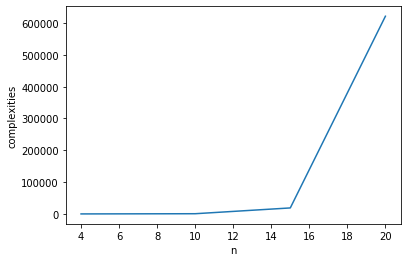

In [33]:
complexities = [dfs[x]["results"]["complexity"].mean() for x in NUMBERS]
# complexities
sum_dict = {"n": NUMBERS, "complexities": complexities}
df_sum = pd.DataFrame(sum_dict)
df_sum

sns.lineplot(x="n", y="complexities", data=df_sum)
# Do statistics

# dfs[20]["solutions"]

# with open("./time_spent.json", "w") as f:
#     f.write(json.dumps(TIME_SPENT))
# with open("./errors.json", "w") as f:
#     f.write(json.dumps(ERRORS))

,n,seconds,errors,error lines,path
0,4,0.002437,[],NaN,NaN
1,10,0.008561,[],NaN,NaN
2,15,0.139114,[],NaN,NaN
3,20,3.220594,[],NaN,NaN
4,22,10.276774,[],NaN,NaN


&lt;matplotlib.axes._subplots.AxesSubplot at 0x7f85827257f0&gt;

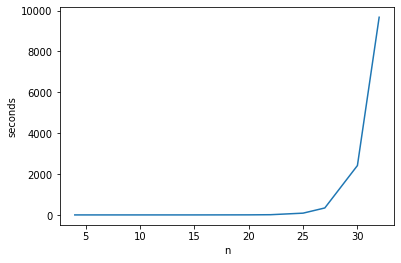

In [34]:
# Plot results

summary = pd.read_csv("./summary.csv", sep=" ", header=None,
                      names=["n", "seconds", "errors", "error lines", "path"])
# pd.read("./time_spent.json", orient="index")
# summary["seconds"] = 
# df[df.columns[0]] = pd.to_datetime(df.columns[0], format='%d.%m.%Y')
display(summary.head())

sns.lineplot(x="n", y="seconds", data=summary)
# sns.regplot(x="n", y="seconds", data=summary, order=2)